In [2]:
import pandas as pd
import seaborn as sns
import random
import math
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
from scipy.signal import savgol_filter

In [3]:
datasets = pd.read_csv("MyDatasets.csv")

In [4]:
datasets.head()

,xdata,ydata,target
0,1.418930,0.011068,0
1,0.644987,0.211065,0
2,1.889527,-0.000879,0
3,0.942787,-0.106720,0
4,0.839481,0.995049,0


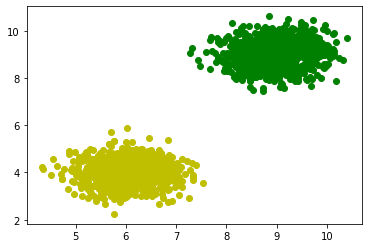

In [10]:
plt.figure()

for i in range(len(datasets['target'])):
    if datasets['target'].iloc[i] == 0:
        plt.plot(datasets['xdata'].iloc[i]+8, datasets['ydata'].iloc[i]+8, "go")
    else:
        plt.plot(datasets['xdata'].iloc[i]+3, datasets['ydata'].iloc[i]+3, "yo")

plt.show()

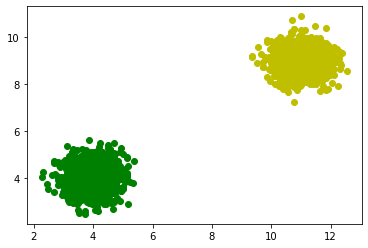

In [11]:
plt.figure()

for i in range(len(datasets['target'])):
    if datasets['target'].iloc[i] == 1:
        plt.plot(datasets['xdata'].iloc[i]+8, datasets['ydata'].iloc[i]+8, "yo")
    else:
        plt.plot(datasets['xdata'].iloc[i]+3, datasets['ydata'].iloc[i]+3, "go")

plt.show()

In [ ]:
plt.figure()

for i in range(len(datasets['target'])):
    if datasets['target'].iloc[i] == 1:
        plt.plot(datasets['xdata'].iloc[i]+8, datasets['ydata'].iloc[i]+8, "yo")
    else:
        plt.plot(datasets['xdata'].iloc[i]+3, datasets['ydata'].iloc[i]+3, "go")

plt.show()

In [20]:
X1 = datasets["xdata"].values.tolist()
X2 = datasets["ydata"].values.tolist()
Y = datasets["target"].values.tolist()

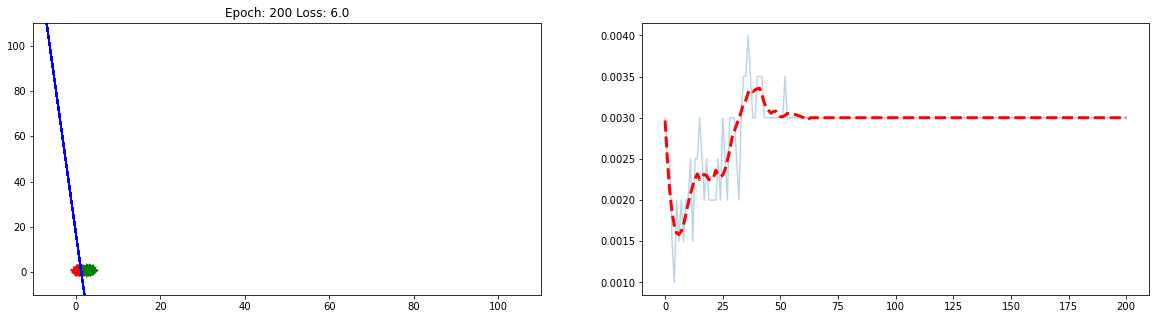

Epoch: 200 Loss: 0.003
802


In [16]:
W = [random.random(), random.random()]
b = random.random()

# W = [random.uniform(-1,1), random.uniform(-1,1)]
# b = random.uniform(-1,1)

lr = 0.1
theta=0.5

epoch = 0
count = 0


loss = []

while epoch <= 200:
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count += 1
    
    loss.append(1/len(X1)*total_error)
    
    plt.figure(figsize=(20,5))
    #loss.append([epoch, total_error])   
    display.clear_output(wait=True)
    plt.subplot(1,2,1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "r+")
        else:
            plt.plot(X1[i], X2[i], "g+")

        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr=(theta-b)/W[0]
        yintr=(theta-b)/W[1]

        slope = -yintr/xintr
        xx = plt.xlim()
#                 print(xx)
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx,yeq, 'b-')

    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1,2,2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3) # window size 51, polynomial order 3
        plt.plot(yhat, 'r--', lw=3)

    plt.show()
            
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1
    
    print(count)

